# 회귀분석 연습

와인품질데이터셋을 로드하여 scikit-learn 패키지를 이용해 선형회귀 분석모델을 구축하시오

1. 훈련용 데이터와 평가용 데이터를 8:2로 분할하시오.


2. LinearRegression 모델을 생성하여 선형회귀 분석모델을 traning하고 데이터 Y (Y_test)와 모델에서 구한 예측 결과(Y_predict)의 오차를 계산하여 MSE, RMSE, R2를 구하시오.

3. seaborn의 regplot()를 이용하여 산점도 그래프와 선형 회귀 그래프를 함께 그려보시오. (선택사항)


In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [43]:
data_path = '/Users/jihunjang/workspace/ust/bigdata/lecture/13/'

In [44]:
red_df = pd.read_csv(data_path + 'winequality-red.csv', sep=';', header=0, engine='python')
white_df = pd.read_csv(data_path + 'winequality-white.csv', sep=';', header=0, engine='python')

In [45]:
wine = pd.concat([red_df, white_df])
wine.columns = wine.columns.str.replace(' ', '_')

In [46]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1. 훈련용 데이터와 평가용 데이터를 8:2로 분할하시오.

In [47]:
#훈련용 데이터와 평가용 데이터를 8:2로 분할하시오.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # 사이킷런을 사용하여 머신러닝 회귀 분석을 하기 위한 LinearRegression과 데이터셋 분리 작업을 위한
from sklearn.metrics import r2_score  #train_test_split, 성능 측정을 위한 평가 지표인 mean_squared_ error, r2_score를 임포트
import numpy as np

#X, Y 분할하기
Y = wine['quality']
X = wine.drop(['quality'], axis=1, inplace=False)  #PRICE 피처를 회귀식의 종속 변수 Y로 설정하고 PRICE를 제외 drop( )한 나머지 피처를 독립 변수 X로 설정

#훈련용 데이터와 평가용 데이터 분할하기
#여기를 완성하시오.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 2. LinearRegression 모델을 생성하여 선형회귀 분석모델을 traning하고 데이터 Y (Y_test)와 모델에서 구한 예측 결과(Y_predict)의 오차를 계산하여 MSE, RMSE, R2를 구하시오. (Standard Scaler 적용)

In [48]:
#다음을 완성하시오
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')  # f-string formatting
print(f'R^2(Variance score) : {r2:.3f}')  #


MSE : 0.547, RMSE : 0.739
R^2(Variance score) : 0.260


### 3. seaborn의 regplot()를 이용하여 산점도 그래프와 선형 회귀 그래프를 함께 그려보시오.(선택사항)

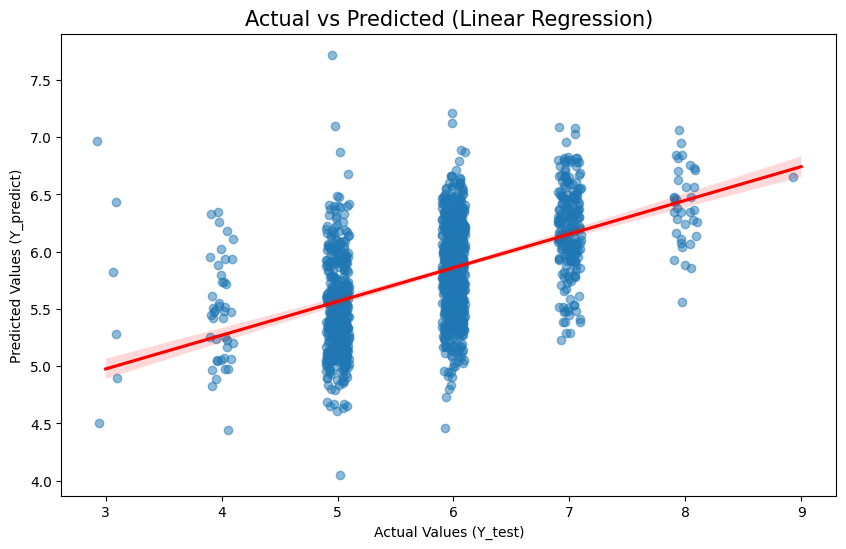

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.regplot(x=y_test, y=y_pred, x_jitter=0.1,
            line_kws={'color': 'red'},
            scatter_kws={'alpha': 0.5}
            )

plt.title('Actual vs Predicted (Linear Regression)', fontsize=15)
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_predict)')

plt.show()

In [50]:
#다음을 완성하시오.